# 🌌 Introduction to Cosmology with Astropy

This notebook introduces basic cosmological concepts using the Python package **Astropy**.
You will explore different cosmological models like WMAP and Planck and compute fundamental quantities like distances and lookback times.

📚 **References**:
- [Astropy Cosmology Documentation](https://docs.astropy.org/en/stable/cosmology/index.html)
- [Astropy Cosmology Tutorial on GitHub](https://github.com/vkaustubh/astropy-tutorial/blob/master/05%20-%20Cosmology.ipynb)


In [1]:
import numpy as np
from astropy import cosmology


### Print the list of built-in cosmological models available in Astropy.


In [2]:
print(cosmology.available)

('WMAP1', 'WMAP3', 'WMAP5', 'WMAP7', 'WMAP9', 'Planck13', 'Planck15', 'Planck18')


#### These include results from different satellite missions like WMAP and Planck.
They are predefined models of a flat universe (FlatLambdaCDM). For detailed descriptions, see: https://docs.astropy.org/en/stable/cosmology/realizations.html


# Select cosmology

In [3]:
from astropy.cosmology import Planck18 as cosmo
print(cosmo.__doc__)
print('---')
print("\n".join([i for i in dir(cosmo) if not i[0] == "_"]))

Planck18 instance of FlatLambdaCDM cosmology
(from Planck Collaboration 2018, 2020, A&A, 641, A6  (Paper VI), Table 2 (TT, TE, EE + lowE + lensing + BAO))
---
H
H0
Neff
Ob
Ob0
Ode
Ode0
Odm
Odm0
Ogamma
Ogamma0
Ok
Ok0
Om
Om0
Onu
Onu0
Otot
Otot0
Tcmb
Tcmb0
Tnu
Tnu0
abs_distance_integrand
absorption_distance
age
angular_diameter_distance
angular_diameter_distance_z1z2
arcsec_per_kpc_comoving
arcsec_per_kpc_proper
clone
comoving_distance
comoving_transverse_distance
comoving_volume
critical_density
critical_density0
de_density_scale
differential_comoving_volume
distmod
efunc
from_format
h
has_massive_nu
hubble_distance
hubble_time
inv_efunc
is_equivalent
is_flat
kpc_comoving_per_arcmin
kpc_proper_per_arcmin
lookback_distance
lookback_time
lookback_time_integrand
luminosity_distance
m_nu
meta
name
nonflat
nu_relative_density
parameters
read
scale_factor
scale_factor0
to_format
w
write


## 🧭 What is the Hubble Constant?

The **Hubble constant** (denoted as $H_0$) is a key number in cosmology that describes the current rate of expansion of the universe.

- It tells us **how fast galaxies are moving away** from us due to the expansion of space.
- Its units are usually kilometers per second per megaparsec (km/s/Mpc).
  - This means that for every megaparsec (about 3.26 million light-years), the velocity of a galaxy increases by about 70 km/s.
- A typical value from the **Planck 2018** results is:
  
  $$ H_0 \approx 67.66 \text{ km/s/Mpc} $$

### Why is it important?

Knowing the Hubble constant helps us:
- Estimate the **age of the universe**
- Measure **distances to far-away galaxies**
- Understand the **overall structure and evolution** of the universe

For more, see [Wikipedia: Hubble's law](https://en.wikipedia.org/wiki/Hubble%27s_law).


In [4]:
print('Hubble constant at z=0')
print(cosmo.H0.value, cosmo.H0.unit )

Hubble constant at z=0
67.66 km / (Mpc s)


In [5]:
print('the age of the universe at z = 0:')
cosmo.age(0)  

the age of the universe at z = 0:


<Quantity 13.7868853 Gyr>

### Transform a Cosmology object to and from a Table object
More: https://docs.astropy.org/en/stable/cosmology/io/builtin.html#module-astropy.cosmology._io.mapping

In [6]:
ct = cosmo.to_format("astropy.table")
ct


name,H0,Om0,Tcmb0,Neff,m_nu,Ob0
,km / (Mpc s),,K,,eV,
str8,float64,float64,float64,float64,float64[3],float64
Planck18,67.66,0.30966,2.7255,3.046,0.0 .. 0.06,0.04897


### Basic Quantities at Redshift z

In [7]:
z = 0  # example redshift
print("Redshift: ", z)
print('scale factor (a): ', cosmo.scale_factor(z))

# Hubble parameter at z
print("H(z):", cosmo.H(z))

# Age of the Universe at z
print("Age at z:", cosmo.age(z))

# Lookback time
print("Lookback time:", cosmo.lookback_time(z))

# Comoving distance
print("Comoving distance:", cosmo.comoving_distance(z))

# Luminosity and angular diameter distances
print("Luminosity distance:", cosmo.luminosity_distance(z))
print("Angular diameter distance:", cosmo.angular_diameter_distance(z))

# Cosmic Microwave background (CMB)temperature 
print("Cosmic Microwave background (CMB)temperature ", cosmo.Tcmb(z))


Redshift:  0
scale factor (a):  1.0
H(z): 67.66 km / (Mpc s)
Age at z: 13.786885302009708 Gyr
Lookback time: 0.0 Gyr
Comoving distance: 0.0 Mpc
Luminosity distance: 0.0 Mpc
Angular diameter distance: 0.0 Mpc
Cosmic Microwave background (CMB)temperature  2.7255 K


What the code do:

- **`scale_factor(z)`**  
  Returns the scale factor \( a \). At \( z = 0 \), \( a = 1 \), meaning the universe is at its full current size.

- **`H(z)`**  
  The **Hubble parameter** at redshift \( z \), indicating the rate of expansion of the universe in km/s/Mpc.

- **`age(z)`**  
  The **age of the universe** at this redshift, expressed in gigayears (Gyr). At \( z = 0 \), this gives the current age of the universe.

- **`lookback_time(z)`**  
  The time difference (in Gyr) between now and when light was emitted from a source at redshift \( z \). At \( z = 0 \), this is 0.

- **`comoving_distance(z)`**  
  Measures the distance to an object accounting for the expansion of the universe, in megaparsecs (Mpc).

- **`luminosity_distance(z)`**  
  Used to relate an object's intrinsic luminosity to its observed brightness.

- **`angular_diameter_distance(z)`**  
  Relates an object's physical size to how large it appears on the sky. Important for converting between arcseconds and kiloparsecs.

- **`Tcmb(z)`**  
  The **temperature of the cosmic microwave background** (CMB) at redshift \( z \). At \( z = 0 \), it is about 2.725 K.


## Notes about units:

While cosmologists use many different ways to describe distance — like how bright something looks or how old the universe is - redshift is the key measurement that underpins them all.

In [8]:
import astropy.cosmology.units as cu
import astropy.units as u
# See more: https://docs.astropy.org/en/stable/cosmology/units.html

z = 1100 * cu.redshift

#Redshift to be converted to other units, like CMB temperature:
print(z.to(u.K, cu.with_redshift(cosmo)))

# or a physical distance (comoving, lookback, or luminosity):
print(z.to(u.Mpc, cu.with_redshift(cosmo, distance="comoving")) )
print(z.to(u.Mpc, cu.with_redshift(cosmo, distance="lookback")) )
print(z.to(u.Mpc, cu.with_redshift(cosmo, distance="luminosity")) )

3000.7754999999997 K
13886.327957431411 Mpc
4226.965872566206 Mpc
15288847.081131984 Mpc


## Plotting Key Quantities (e.g. cosmic time VS redshift)

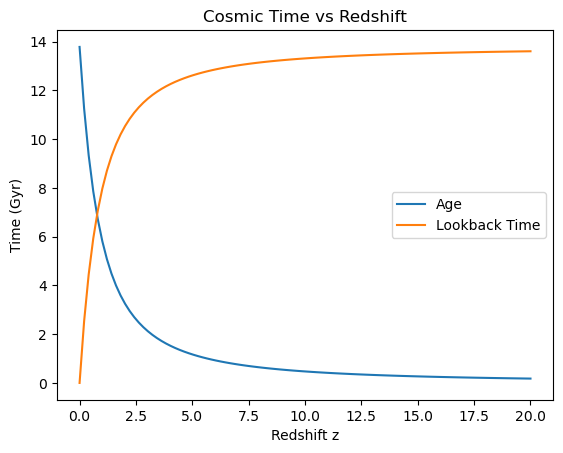

In [9]:
import numpy as np
import matplotlib.pyplot as plt

z_vals = np.linspace(0.00, 20, 100)

plt.figure()
plt.plot(z_vals, cosmo.age(z_vals), label='Age')
plt.plot(z_vals, cosmo.lookback_time(z_vals), label='Lookback Time')
plt.xlabel("Redshift z")
plt.ylabel("Time (Gyr)")
plt.legend()
plt.title("Cosmic Time vs Redshift")
plt.show()


# Vectorized Distance Calculations

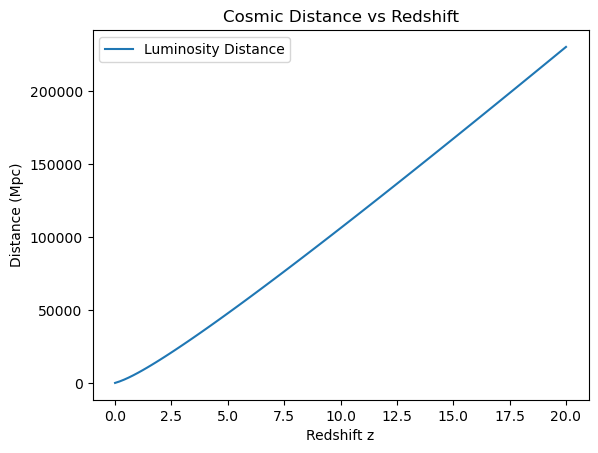

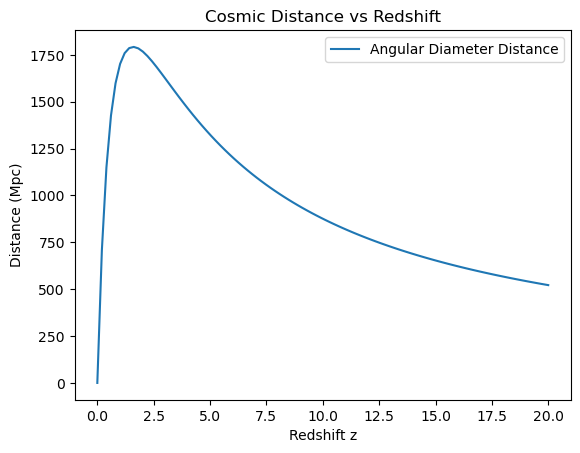

In [10]:
z_vals = np.linspace(0.00, 20, 100)

# Distances over redshift array
d_lum = cosmo.luminosity_distance(z_vals)
d_ang = cosmo.angular_diameter_distance(z_vals)

plt.figure()
plt.plot(z_vals, d_lum, label='Luminosity Distance')
plt.xlabel("Redshift z")
plt.ylabel("Distance (Mpc)")
plt.legend()
plt.title("Cosmic Distance vs Redshift")
plt.show()

plt.figure()
plt.plot(z_vals, d_ang, label='Angular Diameter Distance')
plt.xlabel("Redshift z")
plt.ylabel("Distance (Mpc)")
plt.legend()
plt.title("Cosmic Distance vs Redshift")
plt.show()

# Custom Cosmology

FlatLambdaCDM is a model of the universe that assumes it looks the same in every direction (isotropic) and at every location (homogeneous). It’s based on a special solution to Einstein’s equations, known as the Friedmann–Lemaître–Robertson–Walker (FLRW) metric, named after the scientists who developed it.

In [11]:
from astropy.cosmology import FlatLambdaCDM
custom_cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)
print(custom_cosmo)  


FlatLambdaCDM(H0=70.0 km / (Mpc s), Om0=0.3, Tcmb0=2.725 K, Neff=3.04, m_nu=[0. 0. 0.] eV, Ob0=0.0)


Note: Additional cosmological parameters, such as Neff (the effective number of neutrino species), have default values but can be explicitly specified when creating the model.

In [12]:
# Better practice:
import astropy.units as u
custom_cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3, Tcmb0=2.725 * u.K)

## Exercise: 
### Use your customize cosmology and replot the cosmic distance or time vs. redshift diagrams. How do the results compare to the Planck18 model?

## Want interactive plot to see how cosmological distances vary with cosmologies? 

Install Required Package (if needed)

In [13]:
pip install ipywidgets


DEPRECATION: Loading egg at /Users/jc/anaconda3/envs/my-env/lib/python3.13/site-packages/lmfit-1.3.3-py3.13.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/jc/anaconda3/envs/my-env/lib/python3.13/site-packages/bilby-2.5.0-py3.13.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/jc/anaconda3/envs/my-env/lib/python3.13/site-packages/scintools-0.4-py3.13.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/jc/anaconda3/envs/my-env/lib/python3.13/site-packages/

In [14]:
from ipywidgets import interact, FloatSlider
#import numpy as np
#import matplotlib.pyplot as plt
#from astropy.cosmology import FlatLambdaCDM
#import astropy.units as u

# Redshift range
z_vals = np.linspace(0.00, 5, 200)


# Define plotting function for time
def plot_cosmic_time(H0=70):
    cosmo = FlatLambdaCDM(H0=H0, Om0=0.3)
    age   = cosmo.age(z_vals)
    lookback = cosmo.lookback_time(z_vals)

    plt.figure(figsize=(8,5))
    plt.plot(z_vals, age, label='Age of the Universe')
    plt.plot(z_vals, lookback, label='Lookback Time')
    plt.xlabel("Redshift z")
    plt.ylabel("Time (Gyr)")
    plt.title(f"Cosmic Time vs Redshift (H₀ = {H0:.1f} km/s/Mpc)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Create interactive widget
interact(plot_cosmic_time, H0=FloatSlider(value=70, min=50, max=90, step=1, description='H₀'));


interactive(children=(FloatSlider(value=70.0, description='H₀', max=90.0, min=50.0, step=1.0), Output()), _dom…

In [15]:
# Define plotting function
def plot_distances(H0=70):
    cosmo = FlatLambdaCDM(H0=H0, Om0=0.3)
    d_lum = cosmo.luminosity_distance(z_vals)
    d_ang = cosmo.angular_diameter_distance(z_vals)

    plt.figure(figsize=(8,5))
    plt.plot(z_vals, d_lum, label='Luminosity Distance')
    plt.plot(z_vals, d_ang, label='Angular Diameter Distance')
    plt.xlabel("Redshift z")
    plt.ylabel("Distance (Mpc)")
    plt.title(f"Distances vs Redshift (H₀ = {H0:.1f} km/s/Mpc)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Create interactive widget
interact(plot_distances, H0=FloatSlider(value=70, min=50, max=90, step=1, description='H₀'));


interactive(children=(FloatSlider(value=70.0, description='H₀', max=90.0, min=50.0, step=1.0), Output()), _dom…

### 🧾 What is the wCDM Model?

The **wCDM** model is an extension of the standard **ΛCDM** cosmological model. It allows the **dark energy equation of state** parameter \( w \) to differ from the value of a true cosmological constant (\( w = -1 \)).

- In wCDM, \( w \) is kept **constant over time**, typically referred to as \( w_0 \).
- This model still assumes a **homogeneous and isotropic universe**, but with more flexibility in how dark energy behaves.

By modifying \( w \), cosmologists can explore scenarios where dark energy does not act exactly like a cosmological constant, helping test the limits of ΛCDM and better match observational data.


In [16]:
from astropy.cosmology import wCDM
# Interactive plot function
def plot_cosmo(H0=70, Om0=0.3, Ode0=0.7, w0=-1.0):
    if Om0 + Ode0 > 1.5 or Om0 + Ode0 < 0.5:
        print("⚠️ Warning: Unphysical total density (Ω_total ≠ 1 ± ε). Curvature may be unrealistic.")
    
    cosmo = wCDM(H0=H0, Om0=Om0, Ode0=Ode0, w0=w0)
    d_lum = cosmo.luminosity_distance(z_vals)
    d_ang = cosmo.angular_diameter_distance(z_vals)

    plt.figure(figsize=(8, 5))
    plt.plot(z_vals, d_lum, label="Luminosity Distance")
    plt.plot(z_vals, d_ang, label="Angular Diameter Distance")
    plt.xlabel("Redshift z")
    plt.ylabel("Distance (Mpc)")
    plt.title(f"H₀ = {H0} km/s/Mpc | Ωₘ = {Om0} | Ω_Λ = {Ode0} | w₀ = {w0}")
    plt.legend()
    plt.grid(True)
    plt.show()

# Create interactive sliders
interact(
    plot_cosmo,
    H0=FloatSlider(value=70, min=50, max=90, step=1, description='H₀'),
    Om0=FloatSlider(value=0.3, min=0.1, max=0.9, step=0.01, description='Ωₘ'),
    Ode0=FloatSlider(value=0.7, min=0.0, max=1.0, step=0.01, description='Ω_Λ'),
    w0=FloatSlider(value=-1.0, min=-2.0, max=-0.3, step=0.05, description='w₀'),
);

interactive(children=(FloatSlider(value=70.0, description='H₀', max=90.0, min=50.0, step=1.0), FloatSlider(val…